In [1]:
#### PCA Test ####
gc()

#設定工作目錄
setwd("/Users/huangyiling/GitHub/EB101_TeamSpade_project/DataModel/people_Model1")

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,519217,27.8,1162317,62.1,642320,34.4
Vcells,985579,7.6,8388608,64.0,1774266,13.6


In [2]:
# 安裝必要套件
# install.packages("factoextra")
# install.packages("FactoMineR")
# install.packages("ade4")
# install.packages("magrittr")
# install.packages("ggplot2")

In [3]:
# 載入必要套件
library(ade4)
library(factoextra)
library(FactoMineR)
library(ggplot2)
library(magrittr)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Attaching package: ‘FactoMineR’

The following object is masked from ‘package:ade4’:

    reconst



In [4]:
# 載入資料
data_all<-read.csv("peopleSample.csv")
head(data_all)

X,Sex,Age,Height,Weight,BMI,Calories,Moisture,Protein,Saturated_fat,...,Zn,P,VitaminA,VitaminE,VitaminB_group,VitaminC,Fatty_acid_S,Fatty_acid_M,Fatty_acid_P,Cholesterol
0,0,19,140,31.4,16,1406.936,940.800,34.49600,140.6936,...,12,800,500,12,20.59,100,140.6936,84.41614,12.66242,300
1,0,19,141,31.8,16,1425.467,954.288,34.99056,142.5467,...,12,800,500,12,20.59,100,142.5467,85.52800,12.82920,300
2,0,19,142,32.3,16,1444.066,967.872,35.48864,144.4066,...,12,800,500,12,20.59,100,144.4066,86.64397,12.99660,300
3,0,19,143,32.7,16,1462.733,981.552,35.99024,146.2733,...,12,800,500,12,20.59,100,146.2733,87.76395,13.16459,300
4,0,19,144,33.2,16,1481.464,995.328,36.49536,148.1464,...,12,800,500,12,20.59,100,148.1464,88.88783,13.33318,300
5,0,19,145,33.6,16,1500.259,1009.200,37.00400,150.0259,...,12,800,500,12,20.59,100,150.0259,90.01552,13.50233,300


In [5]:
# 查看 data 資料結構
str(data_all)

'data.frame':	91200 obs. of  27 variables:
 $ X             : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Sex           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Age           : int  19 19 19 19 19 19 19 19 19 19 ...
 $ Height        : int  140 141 142 143 144 145 146 147 148 149 ...
 $ Weight        : num  31.4 31.8 32.3 32.7 33.2 33.6 34.1 34.6 35 35.5 ...
 $ BMI           : int  16 16 16 16 16 16 16 16 16 16 ...
 $ Calories      : num  1407 1425 1444 1463 1481 ...
 $ Moisture      : num  941 954 968 982 995 ...
 $ Protein       : num  34.5 35 35.5 36 36.5 ...
 $ Saturated_fat : num  141 143 144 146 148 ...
 $ Carbohydrate  : num  816 827 838 848 859 ...
 $ Dietary_fiber : int  27 27 27 27 27 27 27 27 27 27 ...
 $ Na            : int  2400 2400 2400 2400 2400 2400 2400 2400 2400 2400 ...
 $ K             : int  4700 4700 4700 4700 4700 4700 4700 4700 4700 4700 ...
 $ Ca            : int  1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 ...
 $ Mg            : int  320 320 320 320 320 320 320 320 320 320

In [6]:
# 取出部份資料
# data1 <- data_all[c(1,50,100,150,200,250,300,350,400,450,479), 1:27]
# data1
# str(data1)

In [7]:
# data2<-data-all[1:10,c(-5,-10,-11,-12,-22,-23,-24)]
# data2

In [8]:
# data_index = data_all[1]
# data_index

In [9]:
data<-data_all[,2:27]
# data<-data_all
data

Sex,Age,Height,Weight,BMI,Calories,Moisture,Protein,Saturated_fat,Carbohydrate,...,Zn,P,VitaminA,VitaminE,VitaminB_group,VitaminC,Fatty_acid_S,Fatty_acid_M,Fatty_acid_P,Cholesterol
0,19,140,31.4,16,1406.936,940.800,34.49600,140.6936,816.0227,...,12,800,500,12,20.59,100,140.6936,84.41614,12.66242,300
0,19,141,31.8,16,1425.467,954.288,34.99056,142.5467,826.7707,...,12,800,500,12,20.59,100,142.5467,85.52800,12.82920,300
0,19,142,32.3,16,1444.066,967.872,35.48864,144.4066,837.5584,...,12,800,500,12,20.59,100,144.4066,86.64397,12.99660,300
0,19,143,32.7,16,1462.733,981.552,35.99024,146.2733,848.3849,...,12,800,500,12,20.59,100,146.2733,87.76395,13.16459,300
0,19,144,33.2,16,1481.464,995.328,36.49536,148.1464,859.2491,...,12,800,500,12,20.59,100,148.1464,88.88783,13.33318,300
0,19,145,33.6,16,1500.259,1009.200,37.00400,150.0259,870.1500,...,12,800,500,12,20.59,100,150.0259,90.01552,13.50233,300
0,19,146,34.1,16,1519.115,1023.168,37.51616,151.9115,881.0866,...,12,800,500,12,20.59,100,151.9115,91.14689,13.67203,300
0,19,147,34.6,16,1538.031,1037.232,38.03184,153.8031,892.0580,...,12,800,500,12,20.59,100,153.8031,92.28186,13.84228,300
0,19,148,35.0,16,1557.005,1051.392,38.55104,155.7005,903.0629,...,12,800,500,12,20.59,100,155.7005,93.42030,14.01305,300
0,19,149,35.5,16,1576.035,1065.648,39.07376,157.6035,914.1005,...,12,800,500,12,20.59,100,157.6035,94.56212,14.18432,300


In [10]:
# 主成分分析
# data.pca <- dudi.pca(data)

In [11]:
# 主成分分析（保留 6 個主成分）
data.pca <- dudi.pca(df = data, scannf = FALSE, nf = 6)
data.pca

Duality diagramm
class: pca dudi
$call: dudi.pca(df = data, scannf = FALSE, nf = 6)

$nf: 6 axis-components saved
$rank: 12
eigen values: 10.16 5.399 1.532 1.156 0.3562 ...
  vector length mode    content       
1 $cw    26     numeric column weights
2 $lw    91200  numeric row weights   
3 $eig   12     numeric eigen values  

  data.frame nrow  ncol content             
1 $tab       91200 26   modified array      
2 $li        91200 6    row coordinates     
3 $l1        91200 6    row normed scores   
4 $co        26    6    column coordinates  
5 $c1        26    6    column normed scores
other elements: cent norm 

In [12]:
# modified array  
# data.pca$tab

In [13]:
# row coordinates 
tt = data.pca$li
str(tt)
write.csv(tt,"peopleSample_new.csv", row.names = TRUE)

'data.frame':	91200 obs. of  6 variables:
 $ Axis1: num  8.29 8.16 8.02 7.89 7.76 ...
 $ Axis2: num  1.177 1.124 1.071 1.019 0.965 ...
 $ Axis3: num  1.64 1.66 1.68 1.71 1.73 ...
 $ Axis4: num  -1.48 -1.4 -1.33 -1.25 -1.17 ...
 $ Axis5: num  -1.09 -1.09 -1.08 -1.08 -1.08 ...
 $ Axis6: num  -0.496 -0.496 -0.497 -0.497 -0.497 ...


In [14]:
# row normed scores
data.pca$ll

NULL

In [15]:
data.pca$co

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6
Sex,-5.684538e-01,8.147266e-01,-4.510121e-02,-6.270140e-02,-1.787272e-02,6.742520e-02
Age,8.329313e-02,5.837433e-03,-9.243231e-01,2.453733e-01,-3.484971e-02,2.698909e-01
Height,-6.930877e-01,5.884825e-02,8.806475e-02,6.263082e-01,-3.227196e-01,-1.012797e-01
Weight,-8.938495e-01,-3.696595e-01,-1.258380e-01,-1.291367e-01,-1.440388e-01,-3.801074e-02
BMI,-6.254170e-01,-4.912663e-01,-1.998598e-01,-5.587994e-01,1.041521e-01,4.254462e-02
Calories,-7.139644e-01,-1.018752e-01,2.384066e-01,5.220318e-01,3.251196e-01,1.344530e-01
Moisture,-8.938479e-01,-3.696485e-01,-1.258395e-01,-1.291394e-01,-1.440439e-01,-3.801023e-02
Protein,-8.855527e-01,-3.702184e-01,-1.679090e-01,-1.175373e-01,-1.512880e-01,-1.989439e-02
Saturated_fat,-9.334584e-01,-3.383401e-01,5.245854e-02,3.224460e-02,6.300178e-02,5.675541e-03
Carbohydrate,-9.334584e-01,-3.383401e-01,5.245854e-02,3.224460e-02,6.300178e-02,5.675541e-03


In [16]:
data.pca$cl

NULL

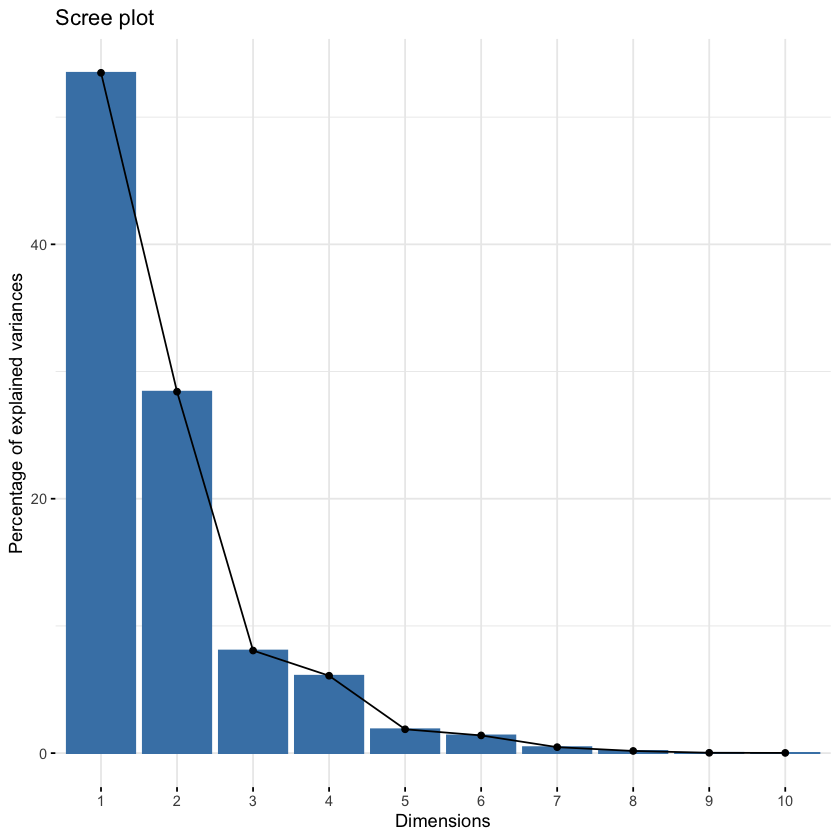

In [17]:
# 陡坡圖（Scree Plot）
fviz_eig(data.pca)

In [18]:
# 取得每個主成分變異數（特徵值）
get_eig(data.pca)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,1.016246e+01,5.348662e+01,53.48662
Dim.2,5.398995e+00,2.841577e+01,81.90239
Dim.3,1.532326e+00,8.064876e+00,89.96727
Dim.4,1.155846e+00,6.083399e+00,96.05066
Dim.5,3.561667e-01,1.874562e+00,97.92523
Dim.6,2.644048e-01,1.391604e+00,99.31683
Dim.7,8.899289e-02,4.683836e-01,99.78521
Dim.8,3.232011e-02,1.701058e-01,99.95532
Dim.9,4.750974e-03,2.500513e-02,99.98032
Dim.10,3.099034e-03,1.631070e-02,99.99664


In [19]:
# 陡坡圖（Scree Plot）
# screeplot(data.pca)

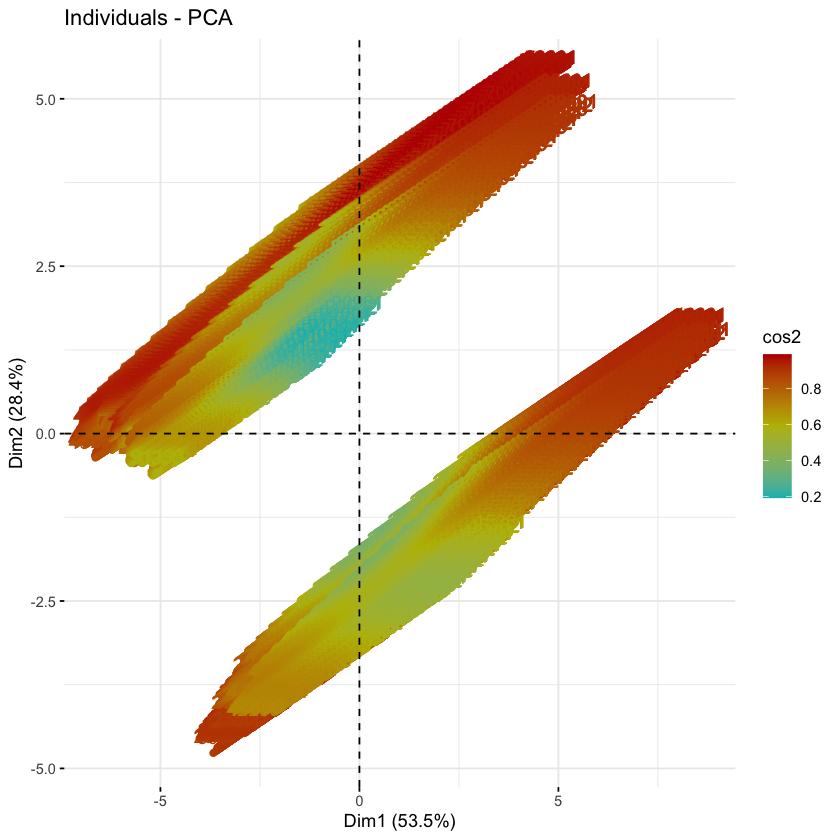

In [20]:
# 顯示每個個體在前兩個主成分上的分布圖
fviz_pca_ind(data.pca,
             col.ind = "cos2",           
             #repel = TRUE,               
             gradient.cols = c("#00BBBB", "#BBBB00", "#BB0000"))
# 依據主成分對該個體的重要性上色
# 避免文字重疊

In [ ]:
data.pca.ind <- get_pca_ind(data.pca)
data.pca.ind
data.pca.ind$coord
data.pca.ind$contrib
data.pca.ind$cos2

In [21]:
# 個體相關資料
data.pca.ind <- get_pca_ind(data.pca)
data.pca.ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

In [22]:
data.pca.ind$coord   # 座標

Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
8.288972,1.17662572,1.641035,-1.479860051,-1.0921014,-0.4957447
8.156877,1.12443011,1.662965,-1.402488846,-1.0879571,-0.4960440
8.022865,1.07118667,1.684411,-1.325641872,-1.0849254,-0.4966775
7.889885,1.01856800,1.706436,-1.248062860,-1.0804807,-0.4968717
7.755005,0.96490951,1.727973,-1.171015260,-1.0771602,-0.4974037
7.621174,0.91188387,1.750086,-1.093242874,-1.0724385,-0.4975001
7.485462,0.85782656,1.771705,-1.016009221,-1.0688531,-0.4979380
7.349347,0.80357604,1.793362,-0.938688097,-1.0651444,-0.4983316
7.214309,0.74997079,1.815588,-0.860653331,-1.0600527,-0.4982951
7.077417,0.69534640,1.837314,-0.783168550,-1.0561157,-0.4986057


In [23]:
data.pca.ind$contrib # 對主成分的貢獻度

Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
0.007413233,2.811699e-04,0.001927036,2.077526e-03,0.003671789,0.001019183
0.007178839,2.567776e-04,0.001978883,1.865968e-03,0.003643975,0.001020414
0.006944890,2.330357e-04,0.002030252,1.667085e-03,0.003623695,0.001023022
0.006716573,2.107037e-04,0.002083694,1.477672e-03,0.003594065,0.001023822
0.006488892,1.890886e-04,0.002136623,1.300859e-03,0.003572008,0.001026015
0.006266863,1.688773e-04,0.002191657,1.133806e-03,0.003540762,0.001026413
0.006045658,1.494484e-04,0.002246140,9.792657e-04,0.003517126,0.001028221
0.005827790,1.311433e-04,0.002301389,8.358876e-04,0.003492761,0.001029847
0.005615596,1.142302e-04,0.002358787,7.026867e-04,0.003459448,0.001029696
0.005404506,9.819619e-05,0.002415576,5.818563e-04,0.003433799,0.001030980


In [24]:
data.pca.ind$cos2    # 主成分對該個體的重要性

Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
0.8934201,1.800243e-02,0.03501791,2.847710e-02,0.01550887,0.003195734
0.8940626,1.698967e-02,0.03716091,2.643132e-02,0.01590537,0.003306439
0.8944807,1.594565e-02,0.03942829,2.442106e-02,0.01635731,0.003428159
0.8948043,1.491306e-02,0.04185688,2.239029e-02,0.01678111,0.003548749
0.8948654,1.385373e-02,0.04442911,2.040416e-02,0.01726451,0.003681389
0.8947902,1.281022e-02,0.04718414,1.841241e-02,0.01771831,0.003812973
0.8944066,1.174618e-02,0.05010496,1.647757e-02,0.01823618,0.003957749
0.8937618,1.068509e-02,0.05321823,1.458031e-02,0.01877333,0.004109236
0.8929011,9.649449e-03,0.05655208,1.270780e-02,0.01927830,0.004259778
0.8916437,8.606849e-03,0.06009089,1.091823e-02,0.01985476,0.004425438


In [25]:
# 個體分布圖
# s.label(data.pca$li,
#         xax = 1,  # 主成分 1
#         yax = 2)  # 主成分 2

In [26]:
# s.label(data.pca$li,
#         xax = 1,  # 主成分 1
#         yax = 4)  # 主成分 4

In [27]:
# s.label(data.pca$li,
#         xax = 2,  # 主成分 1
#         yax = 3)  # 主成分 4

In [28]:
# s.label(data.pca$li,
#         xax = 2,  # 主成分 1
#         yax = 4)  # 主成分 4

In [29]:
# s.label(data.pca$li,
#         xax = 1,  # 主成分 1
#         yax = 3)  # 主成分 4

In [30]:
###############################

In [31]:
# s.label(data.pca$l1,
#         xax = 1,  # 主成分 1
#         yax = 4)  # 主成分 2

In [32]:
# s.label(data.pca$l1,
#         xax = 1,  # 主成分 1
#         yax = 2)  # 主成分 2

In [33]:
# s.label(data.pca$l1,
#         xax = 2,  # 主成分 1
#         yax = 3)  # 主成分 2

In [34]:
# s.label(data.pca$l1,
#         xax = 2,  # 主成分 1
#         yax = 4)  # 主成分 4

In [35]:
# s.label(data.pca$l1,
#         xax = 1,  # 主成分 1
#         yax = 3)  # 主成分 2

In [36]:
# s.label(data.pca$l1,
#         xax = 3,  # 主成分 1
#         yax = 4)  # 主成分 2

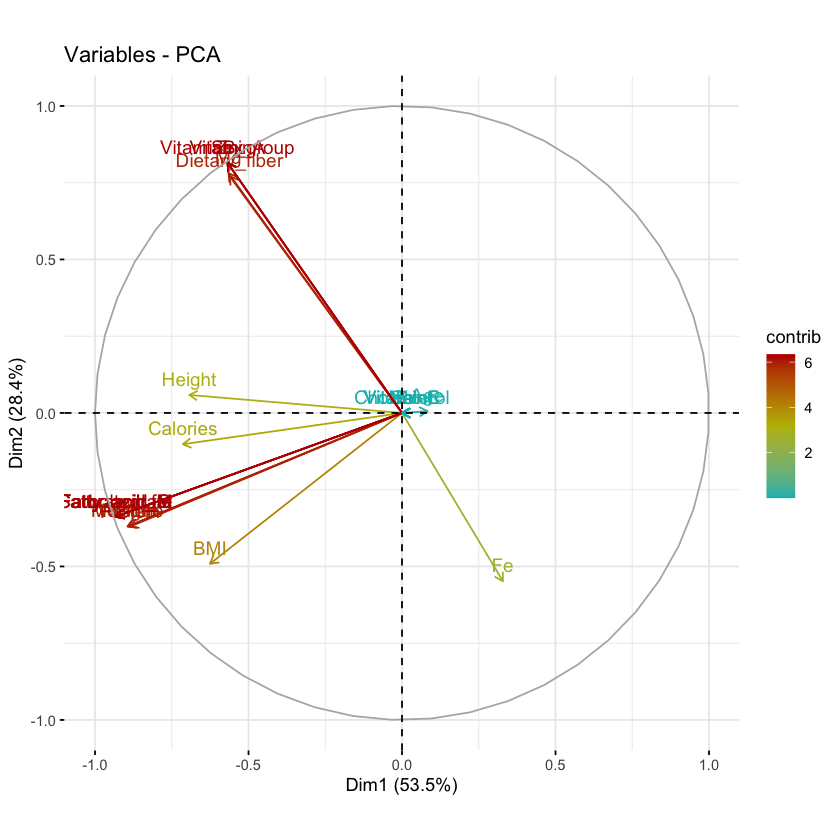

In [37]:
# 變數關係圖
fviz_pca_var(data.pca,
             col.var = "contrib",        # 依據對主成分的貢獻度上色
             #repel = TRUE,               # 避免文字重疊
             gradient.cols = c("#00BBBB", "#BBBB00", "#BB0000"))

In [38]:
# 變數相關資料
data.pca.var <- get_pca_var(data.pca)
data.pca.var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [39]:
data.pca.var$coord   # 座標

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
Sex,-5.684538e-01,8.147266e-01,-4.510121e-02,-6.270140e-02,-1.787272e-02,6.742520e-02
Age,8.329313e-02,5.837433e-03,-9.243231e-01,2.453733e-01,-3.484971e-02,2.698909e-01
Height,-6.930877e-01,5.884825e-02,8.806475e-02,6.263082e-01,-3.227196e-01,-1.012797e-01
Weight,-8.938495e-01,-3.696595e-01,-1.258380e-01,-1.291367e-01,-1.440388e-01,-3.801074e-02
BMI,-6.254170e-01,-4.912663e-01,-1.998598e-01,-5.587994e-01,1.041521e-01,4.254462e-02
Calories,-7.139644e-01,-1.018752e-01,2.384066e-01,5.220318e-01,3.251196e-01,1.344530e-01
Moisture,-8.938479e-01,-3.696485e-01,-1.258395e-01,-1.291394e-01,-1.440439e-01,-3.801023e-02
Protein,-8.855527e-01,-3.702184e-01,-1.679090e-01,-1.175373e-01,-1.512880e-01,-1.989439e-02
Saturated_fat,-9.334584e-01,-3.383401e-01,5.245854e-02,3.224460e-02,6.300178e-02,5.675541e-03
Carbohydrate,-9.334584e-01,-3.383401e-01,5.245854e-02,3.224460e-02,6.300178e-02,5.675541e-03


In [50]:
# 對主成分的貢獻度
data.pca.var$contrib 
# aa=data.pca.var$contrib 
# write.csv(aa, "feature_contribute.csv", row.names = TRUE)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
Sex,3.179740e+00,1.229450e+01,1.327471e-01,3.401375e-01,8.968668e-02,1.719393e+00
Age,6.826838e-02,6.311474e-04,5.575660e+01,5.209006e+00,3.409927e-01,2.754909e+01
Height,4.726913e+00,6.414372e-02,5.061194e-01,3.393723e+01,2.924135e+01,3.879495e+00
Weight,7.861945e+00,2.530992e+00,1.033409e+00,1.442777e+00,5.825132e+00,5.464409e-01
BMI,3.848935e+00,4.470138e+00,2.606751e+00,2.701543e+01,3.045667e+00,6.845733e-01
Calories,5.015963e+00,1.922314e-01,3.709244e+00,2.357730e+01,2.967789e+01,6.837092e+00
Moisture,7.861917e+00,2.530841e+00,1.033434e+00,1.442838e+00,5.825542e+00,5.464264e-01
Protein,7.716671e+00,2.538651e+00,1.839910e+00,1.195230e+00,6.426217e+00,1.496897e-01
Saturated_fat,8.574152e+00,2.120284e+00,1.795896e-01,8.995269e-02,1.114429e+00,1.218274e-02
Carbohydrate,8.574152e+00,2.120284e+00,1.795896e-01,8.995269e-02,1.114429e+00,1.218274e-02


In [51]:
# 主成分對該變數的重要性
data.pca.var$cos2    
# bb=data.pca.var$cos2 
# write.csv(bb, "feature_importance.csv", row.names = TRUE)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
Sex,3.231397e-01,6.637795e-01,2.034120e-03,3.931466e-03,3.194341e-04,4.546158e-03
Age,6.937746e-03,3.407562e-05,8.543731e-01,6.020807e-02,1.214502e-03,7.284112e-02
Height,4.803706e-01,3.463116e-03,7.755401e-03,3.922620e-01,1.041480e-01,1.025757e-02
Weight,7.989669e-01,1.366482e-01,1.583520e-02,1.667628e-02,2.074718e-02,1.444816e-03
BMI,3.911464e-01,2.413426e-01,3.994393e-02,3.122567e-01,1.084765e-02,1.810045e-03
Calories,5.097452e-01,1.037856e-02,5.683772e-02,2.725172e-01,1.057027e-01,1.807760e-02
Moisture,7.989641e-01,1.366400e-01,1.583559e-02,1.667699e-02,2.074864e-02,1.444778e-03
Protein,7.842035e-01,1.370617e-01,2.819343e-02,1.381502e-02,2.288804e-02,3.957867e-04
Saturated_fat,8.713446e-01,1.144740e-01,2.751898e-03,1.039714e-03,3.969224e-03,3.221176e-05
Carbohydrate,8.713446e-01,1.144740e-01,2.751898e-03,1.039714e-03,3.969224e-03,3.221176e-05


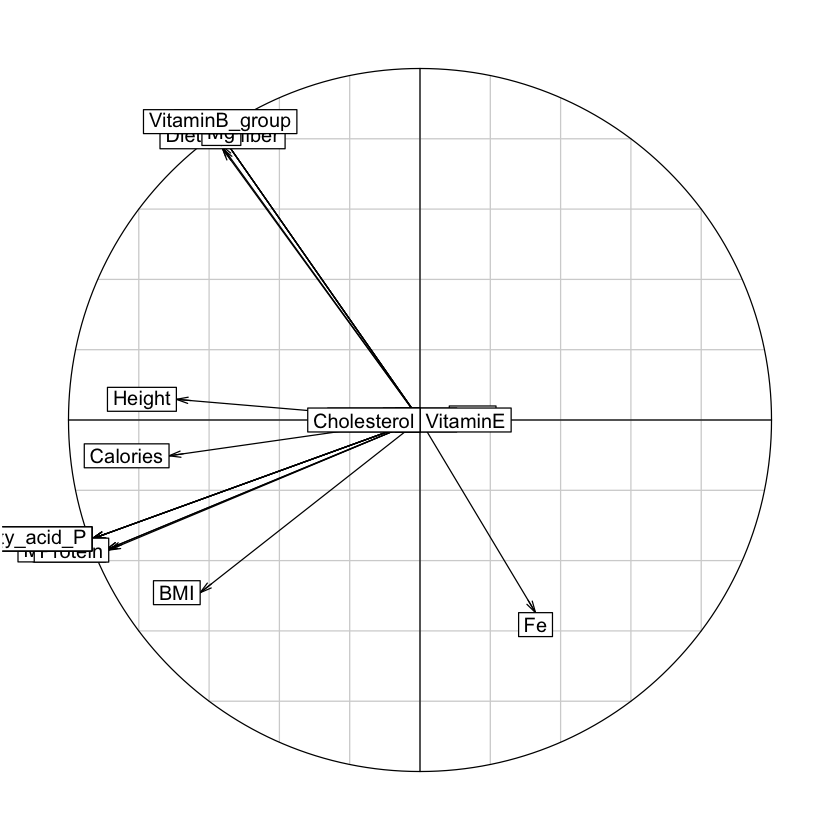

In [42]:
# 變數關係圖
s.corcircle(data.pca$co)

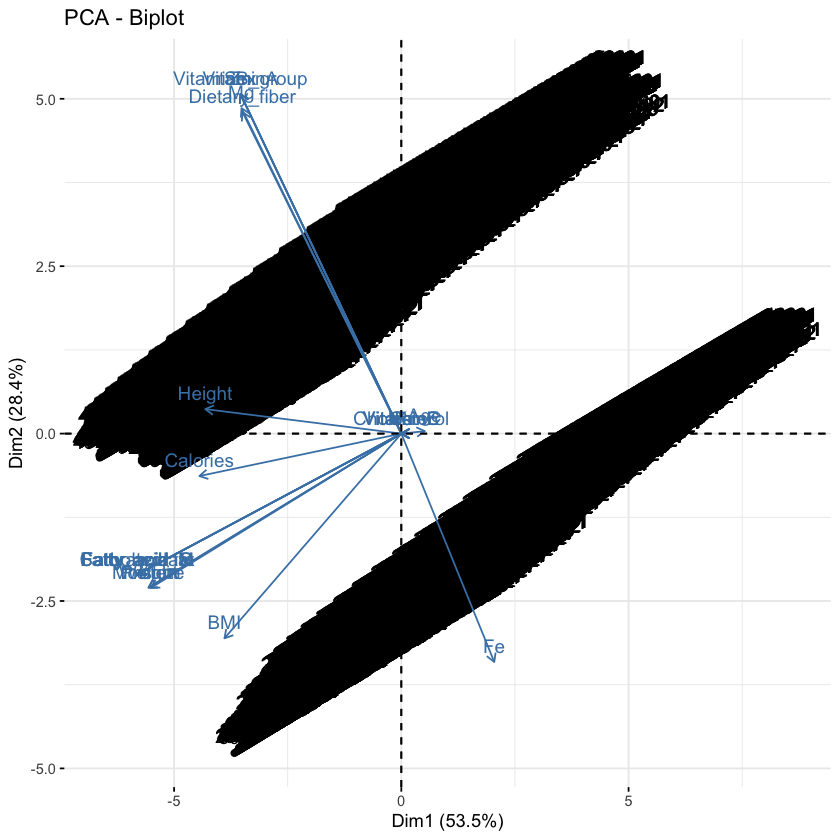

In [43]:
# 雙標圖（Biplot）
fviz_pca_biplot(data.pca, repel = FALSE)

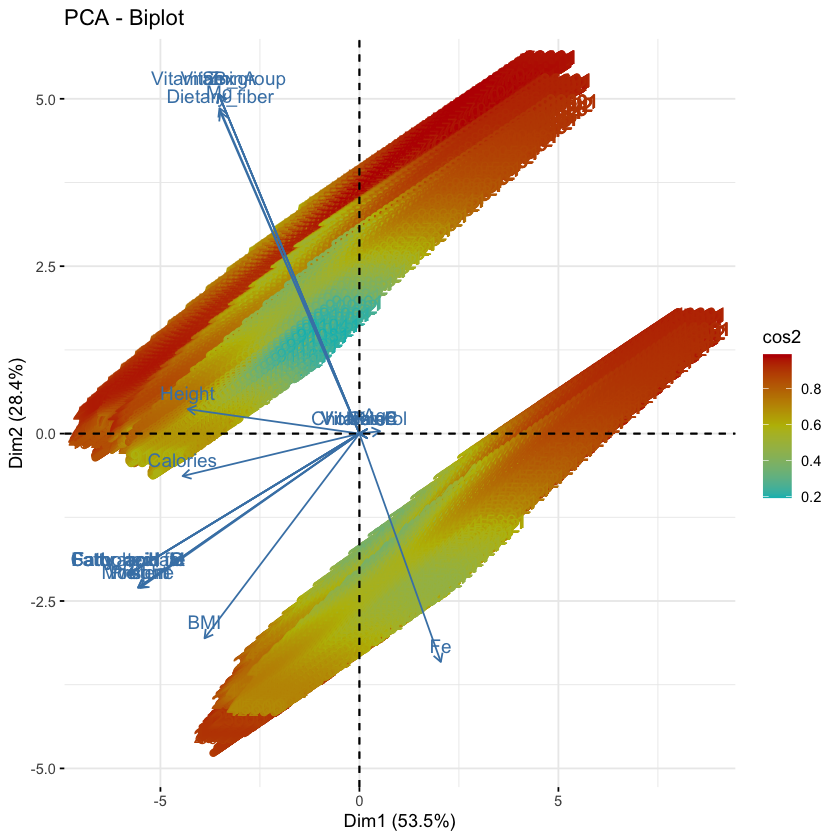

In [44]:
# 雙標圖（Biplot）
fviz_pca_biplot(data.pca,
                col.ind = "cos2",
                #repel = TRUE,
                gradient.cols = c("#00BBBB", "#BBBB00", "#BB0000"),
                repel = FALSE)

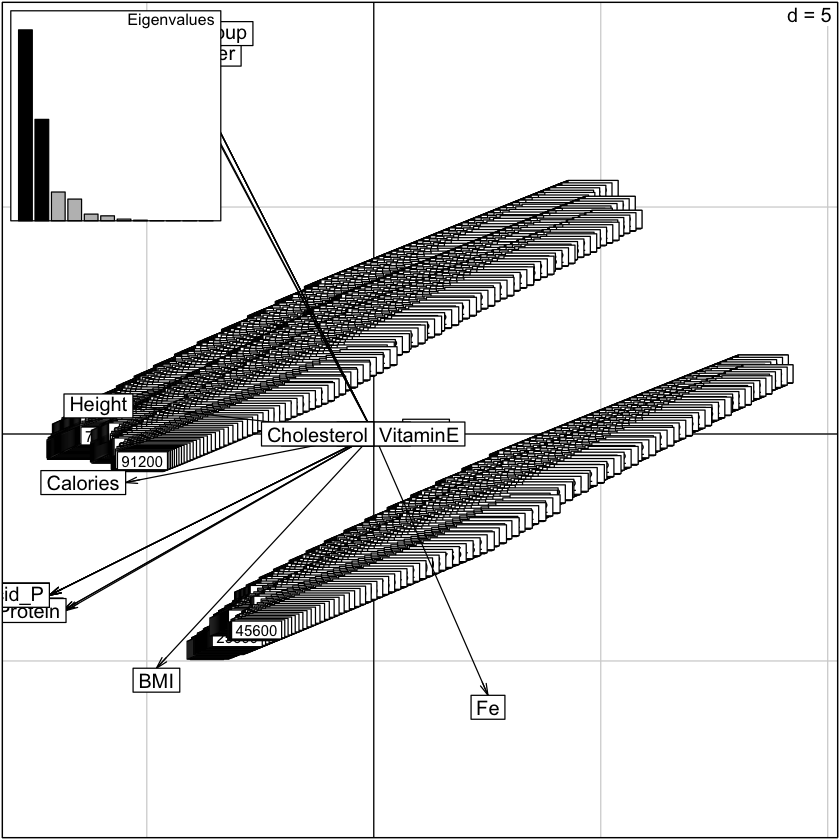

In [45]:
# 雙標圖（Biplot）
scatter(data.pca)

NULL

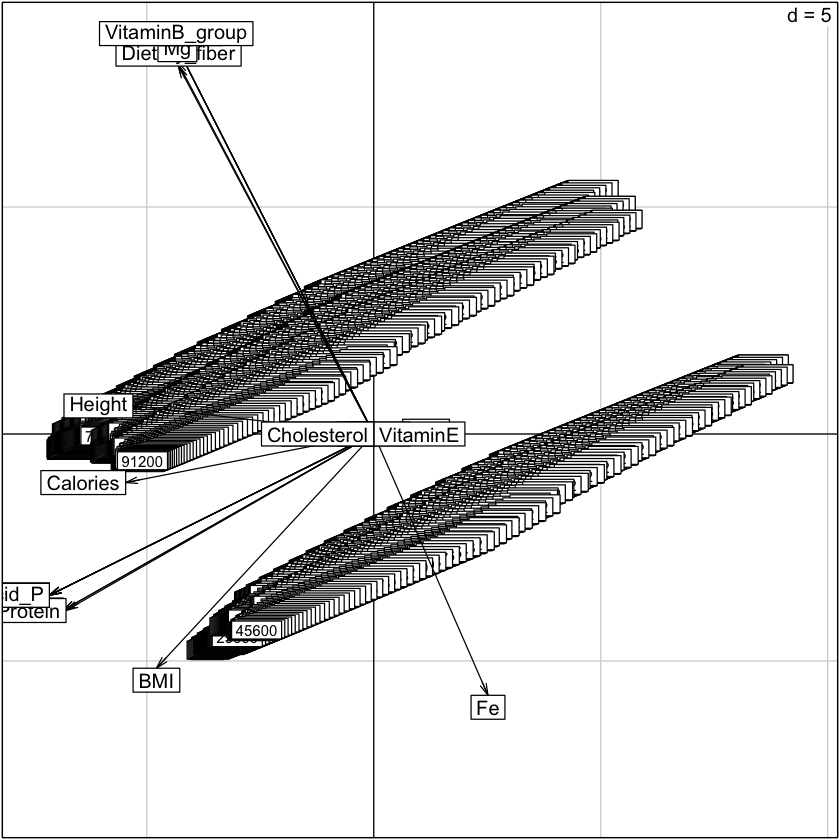

In [46]:
scatter(data.pca, posieig = "none")

In [47]:
======================================================================================
# # 預測用個體資料
# #ind.sup <- data[24:25, 1:10]


# # 計算各主成分座標
# #ind.sup.coord <- suprow(data.pca, ind.sup) %>% .$lisup



# # 繪製個體分布圖
# #p <- fviz_pca_ind(data.pca, repel = TRUE)

# # 加上新增的個體資料
# #fviz_add(p, ind.sup.coord)



# # 群組資料
# groups <- as.factor(data$Competition[1:23])


# # 標示群組資料
# fviz_pca_ind(data.pca,
#              col.ind = groups,            # 依據群組上色
#              addEllipses = TRUE,          # 加上橢圓
#              ellipse.type = "confidence", # 橢圓類型
#              legend.title = "Competition",
#              repel = TRUE)


# # 加上群組標示的個體分佈圖
# s.class(data.pca$li, fac = groups, col = c("#00AFBB",  "#FC4E07"))



# # 加上群組標示的雙標圖
# scatter(data.pca, clab.row = FALSE, posieig = "none")
# s.class(data.pca$li, fac = groups,
#         col = c("#00AFBB",  "#FC4E07"),
#         cstar = FALSE, add.plot = TRUE)


# # 新增的變數資料
# #var.sup <- data.active[1:23, 11:12, drop = FALSE]


# # 預測座標
# #var.coord <- supcol(data.active.pca, scale(var.sup)) %>% .$cosup

# # 計算 cos2
# #var.cos2 <- var.coord^2

# # 變數關係圖
# #p <- fviz_pca_var(data.pca)
# #fviz_add(p, var.coord, geom = "arrow")

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '=='
1: ==
    ^
